In [1]:
# Standard Libraries
import os
import warnings
from collections import Counter, defaultdict

# Data Manipulation and Numerical Operations
import numpy as np
import pandas as pd

# Image Processing
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns

# TensorFlow and Keras
import tensorflow as tf
import tensorflow_datasets as tfds

# Computer Vision Libraries
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Type Hinting
from typing import Dict, List, Tuple, Optional

# PrettyTable for Displaying Tables
from prettytable import PrettyTable

# Suppress Warnings
warnings.filterwarnings("ignore")

# Suppress TensorFlow Warnings and Information Messages
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # '0': all logs, '1': filter INFO, '2': filter WARNING, '3': filter ERROR only

# Disable Eager Execution Warning, if Needed
tf.get_logger().setLevel('ERROR')

# Additional Library
import torch
import hashlib

/opt/anaconda3/lib/python3.11/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.17). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [2]:
import numpy as np
import os

# Directory where the filtered datasets are saved
load_dir = 'voc_ds'

# Load the filtered training datasets
filtered_train_images = np.load(os.path.join(load_dir, 'filtered_train_images.npy'))
filtered_train_classes = np.load(os.path.join(load_dir, 'filtered_train_classes.npy'))
filtered_train_bounding_boxes = np.load(os.path.join(load_dir, 'filtered_train_bounding_boxes.npy'))

# Load the filtered validation datasets
filtered_val_images = np.load(os.path.join(load_dir, 'filtered_val_images.npy'))
filtered_val_classes = np.load(os.path.join(load_dir, 'filtered_val_classes.npy'))
filtered_val_bounding_boxes = np.load(os.path.join(load_dir, 'filtered_val_bounding_boxes.npy'))

# Print the shapes of the loaded datasets to verify
print(f"Loaded Training Images Shape: {filtered_train_images.shape}")
print(f"Loaded Training Classes Shape: {filtered_train_classes.shape}")
print(f"Loaded Training Bounding Boxes Shape: {filtered_train_bounding_boxes.shape}")

print(f"Loaded Validation Images Shape: {filtered_val_images.shape}")
print(f"Loaded Validation Classes Shape: {filtered_val_classes.shape}")
print(f"Loaded Validation Bounding Boxes Shape: {filtered_val_bounding_boxes.shape}")

Loaded Training Images Shape: (5279, 224, 224, 3)
Loaded Training Classes Shape: (5279,)
Loaded Training Bounding Boxes Shape: (5279, 4)
Loaded Validation Images Shape: (3446, 224, 224, 3)
Loaded Validation Classes Shape: (3446,)
Loaded Validation Bounding Boxes Shape: (3446, 4)


In [3]:
class_ids = [
    "Aeroplane",
    "Bicycle",
    "Bird",
    "Boat",
    "Bottle",
    "Bus",
    "Car",
    "Cat",
    "Chair",
    "Cow",
    "Dining Table",
    "Dog",
    "Horse",
    "Motorbike",
    "Person",
    "Potted Plant",
    "Sheep",
    "Sofa",
    "Train",
    "Tvmonitor",
    "Total",
]
class_mapping = dict(zip(range(len(class_ids)), class_ids))


Training Class Distribution:
Class: aeroplane, Count: 429
Class: bicycle, Count: 159
Class: bird, Count: 598
Class: boat, Count: 174
Class: bottle, Count: 100
Class: bus, Count: 127
Class: car, Count: 531
Class: cat, Count: 664
Class: chair, Count: 102
Class: cow, Count: 127
Class: diningtable, Count: 20
Class: dog, Count: 636
Class: horse, Count: 131
Class: motorbike, Count: 140
Class: person, Count: 488
Class: pottedplant, Count: 94
Class: sheep, Count: 91
Class: sofa, Count: 110
Class: train, Count: 400
Class: tvmonitor, Count: 158

Validation Class Distribution:
Class: aeroplane, Count: 307
Class: bicycle, Count: 117
Class: bird, Count: 359
Class: boat, Count: 117
Class: bottle, Count: 84
Class: bus, Count: 66
Class: car, Count: 247
Class: cat, Count: 476
Class: chair, Count: 71
Class: cow, Count: 82
Class: diningtable, Count: 14
Class: dog, Count: 450
Class: horse, Count: 106
Class: motorbike, Count: 83
Class: person, Count: 348
Class: pottedplant, Count: 53
Class: sheep, Count: 

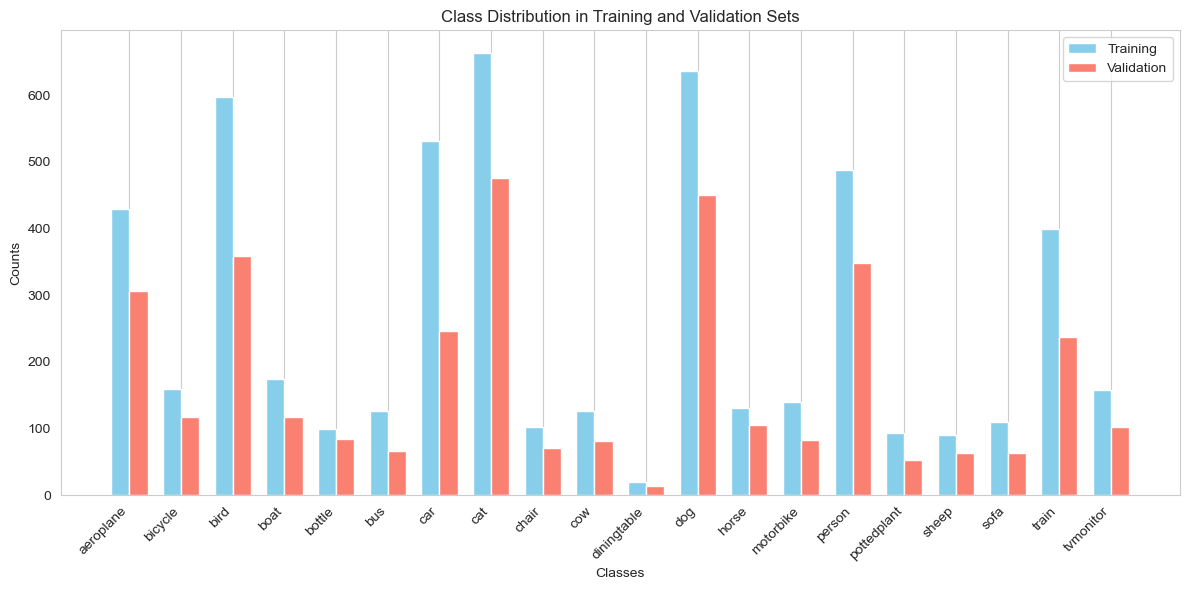

In [4]:
# Function to count class frequencies
def count_classes(classes):
    unique_classes, counts = np.unique(classes, return_counts=True)
    class_distribution = dict(zip(unique_classes, counts))
    return class_distribution

# Get class frequencies for training data
train_class_distribution = count_classes(filtered_train_classes)

# Get class frequencies for validation data
val_class_distribution = count_classes(filtered_val_classes)

# Print class distributions
print("\nTraining Class Distribution:")
for cls, count in train_class_distribution.items():
    print(f"Class: {cls}, Count: {count}")

print("\nValidation Class Distribution:")
for cls, count in val_class_distribution.items():
    print(f"Class: {cls}, Count: {count}")
    
    import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt

def plot_combined_class_distribution(train_distribution, val_distribution):
    classes = list(train_distribution.keys())
    train_counts = [train_distribution.get(cls, 0) for cls in classes]
    val_counts = [val_distribution.get(cls, 0) for cls in classes]
    
    # Set width of bars
    bar_width = 0.35
    x = np.arange(len(classes))  # the label locations
    
    plt.figure(figsize=(12, 6))
    bars1 = plt.bar(x - bar_width/2, train_counts, bar_width, label='Training', color='skyblue')
    bars2 = plt.bar(x + bar_width/2, val_counts, bar_width, label='Validation', color='salmon')
    
    plt.title('Class Distribution in Training and Validation Sets')
    plt.xlabel('Classes')
    plt.ylabel('Counts')
    plt.xticks(x, classes, rotation=45, ha='right')  # Rotate class names for better readability
    plt.grid(axis='y')
    plt.legend()
    plt.tight_layout()
    plt.show()

# Plot combined class distribution
plot_combined_class_distribution(train_class_distribution, val_class_distribution)

In [5]:
# Print total number of images in training and validation sets
total_train_images = len(filtered_train_images)
total_val_images = len(filtered_val_images)

print(f"Total training images: {total_train_images}")
print(f"Total validation images: {total_val_images}")

Total training images: 5279
Total validation images: 3446


In [6]:
import numpy as np
from collections import defaultdict
from tqdm import tqdm  # Import tqdm for the progress bar

# Ensure filtered_train_classes and filtered_val_classes are lists or convert them if they are arrays
if isinstance(filtered_train_classes, np.ndarray):
    filtered_train_classes = filtered_train_classes.tolist()
if isinstance(filtered_val_classes, np.ndarray):
    filtered_val_classes = filtered_val_classes.tolist()

# Combine the datasets
combined_images = np.concatenate((filtered_train_images, filtered_val_images), axis=0)
combined_classes = np.concatenate((filtered_train_classes, filtered_val_classes))  # Use np.concatenate here
combined_bounding_boxes = np.concatenate((filtered_train_bounding_boxes, filtered_val_bounding_boxes), axis=0)  # Use np.concatenate here

# Create a dictionary to hold indices for each class
class_indices = defaultdict(list)

# Populate the class_indices with image indices for each class
for index, cls in tqdm(enumerate(combined_classes), total=len(combined_classes), desc="Populating class indices"):
    class_indices[cls].append(index)

print("Finished populating class indices.")

# Prepare lists to hold the new training and validation data
train_images = []
train_classes = []
train_bounding_boxes = []
val_images = []
val_classes = []
val_bounding_boxes = []

# Split the data for each class
for cls, indices in tqdm(class_indices.items(), desc="Splitting data for each class"):
    np.random.shuffle(indices)  # Shuffle indices for randomness
    split_index = int(0.9 * len(indices))  # 90% for training

    # Append the split data to the respective lists
    train_images.extend(combined_images[indices[:split_index]])
    train_classes.extend([cls] * split_index)
    train_bounding_boxes.extend([combined_bounding_boxes[i] for i in indices[:split_index]])

    val_images.extend(combined_images[indices[split_index:]])
    val_classes.extend([cls] * (len(indices) - split_index))
    val_bounding_boxes.extend([combined_bounding_boxes[i] for i in indices[split_index:]])

print("Finished splitting data into training and validation sets.")

# Convert lists back to arrays
train_images = np.array(train_images)
val_images = np.array(val_images)

# Print the shapes of the new datasets
print(f"New Training Images Shape: {train_images.shape}")
print(f"New Validation Images Shape: {val_images.shape}")

Populating class indices: 100%|██████████| 8725/8725 [00:00<00:00, 1792305.93it/s]


Finished populating class indices.


Splitting data for each class: 100%|██████████| 20/20 [00:11<00:00,  1.67it/s]


Finished splitting data into training and validation sets.
New Training Images Shape: (7844, 224, 224, 3)
New Validation Images Shape: (881, 224, 224, 3)


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Assuming train_classes and val_classes are defined
# Count the occurrences of each class in the training set
train_class_counts = Counter(train_classes)
val_class_counts = Counter(val_classes)

# Prepare data for the DataFrame
classes = sorted(set(train_class_counts.keys()).union(val_class_counts.keys()))
train_counts = [train_class_counts.get(cls, 0) for cls in classes]
val_counts = [val_class_counts.get(cls, 0) for cls in classes]

# Calculate total counts for each class
total_counts = [train_counts[i] + val_counts[i] for i in range(len(classes))]

# Create a DataFrame
class_distribution = pd.DataFrame({
    'Class': classes,
    'Training Count': train_counts,
    'Validation Count': val_counts,
    'Total Count': total_counts
})

# Add a total row
total_row = pd.DataFrame({
    'Class': ['Total'],
    'Training Count': [sum(train_counts)],
    'Validation Count': [sum(val_counts)],
    'Total Count': [sum(total_counts)]
})

class_distribution = pd.concat([class_distribution, total_row], ignore_index=True)

# Display the class distribution table
print(class_distribution)


          Class  Training Count  Validation Count  Total Count
0     aeroplane             662                74          736
1       bicycle             248                28          276
2          bird             861                96          957
3          boat             261                30          291
4        bottle             165                19          184
5           bus             173                20          193
6           car             700                78          778
7           cat            1026               114         1140
8         chair             155                18          173
9           cow             188                21          209
10  diningtable              30                 4           34
11          dog             977               109         1086
12        horse             213                24          237
13    motorbike             200                23          223
14       person             752                84      

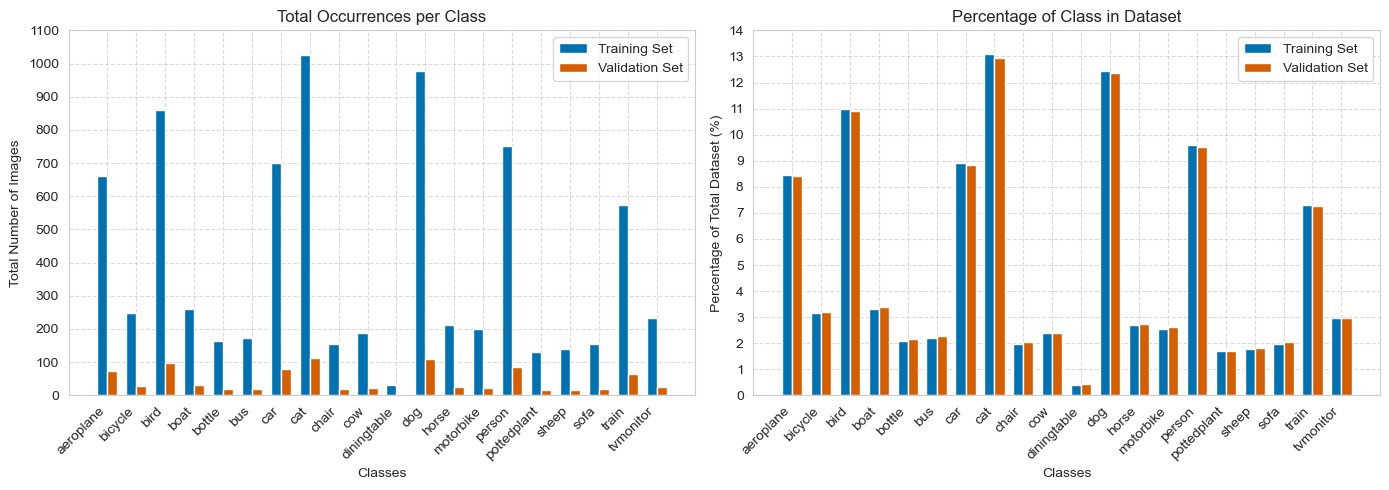

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# Assuming train_classes and val_classes are defined
# Count the occurrences of each class in the training and validation sets
train_class_counts = Counter(train_classes)
val_class_counts = Counter(val_classes)

# Prepare data for plotting
classes = sorted(set(train_class_counts.keys()).union(val_class_counts.keys()))
train_counts = [train_class_counts.get(cls, 0) for cls in classes]
val_counts = [val_class_counts.get(cls, 0) for cls in classes]

# Calculate total counts and percentages
total_counts = [train_counts[i] + val_counts[i] for i in range(len(classes))]
total_train = sum(train_counts)
total_val = sum(val_counts)
train_percentages = [(count / total_train) * 100 for count in train_counts]
val_percentages = [(count / total_val) * 100 for count in val_counts]

# Define custom colors (colorblind-friendly)
colors = ['#0072B2', '#D55E00']  # Blue and orange

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Left Plot: Total Occurrences per Class
bar_width = 0.35
x = np.arange(len(classes))  # the label locations

# Bar for training set
axs[0].bar(x - bar_width / 2, train_counts, width=bar_width, label='Training Set', color=colors[0])

# Bar for validation set
axs[0].bar(x + bar_width / 2, val_counts, width=bar_width, label='Validation Set', color=colors[1])

axs[0].set_xlabel('Classes')
axs[0].set_ylabel('Total Number of Images')
axs[0].set_title('Total Occurrences per Class')
axs[0].set_xticks(x)
axs[0].set_xticklabels(classes, rotation=45, ha='right')
axs[0].legend()
axs[0].grid(linestyle='--', alpha=0.7)  # Adding grid lines to the y-axis

# Set y-axis ticks for total occurrences
max_train_count = max(train_counts) + 10  # Adding a small buffer
axs[0].set_yticks(np.arange(0, max_train_count + 100, 100))  # Adjusting ticks to 100, 200, etc.

# Right Plot: Percentage of Class in Dataset
axs[1].bar(x - bar_width / 2, train_percentages, width=bar_width, label='Training Set', color=colors[0])
axs[1].bar(x + bar_width / 2, val_percentages, width=bar_width, label='Validation Set', color=colors[1])

axs[1].set_xlabel('Classes')
axs[1].set_ylabel('Percentage of Total Dataset (%)')
axs[1].set_title('Percentage of Class in Dataset')
axs[1].set_xticks(x)
axs[1].set_xticklabels(classes, rotation=45, ha='right')
axs[1].legend()
axs[1].grid(linestyle='--', alpha=0.7)  # Adding grid lines to the y-axis

# Set y-axis ticks for percentages
axs[1].set_yticks(np.arange(0, 15, 1))  # Adjusting ticks to 1%, 2%, 3%, ..., 100%

# Show plots
plt.tight_layout()
plt.show()

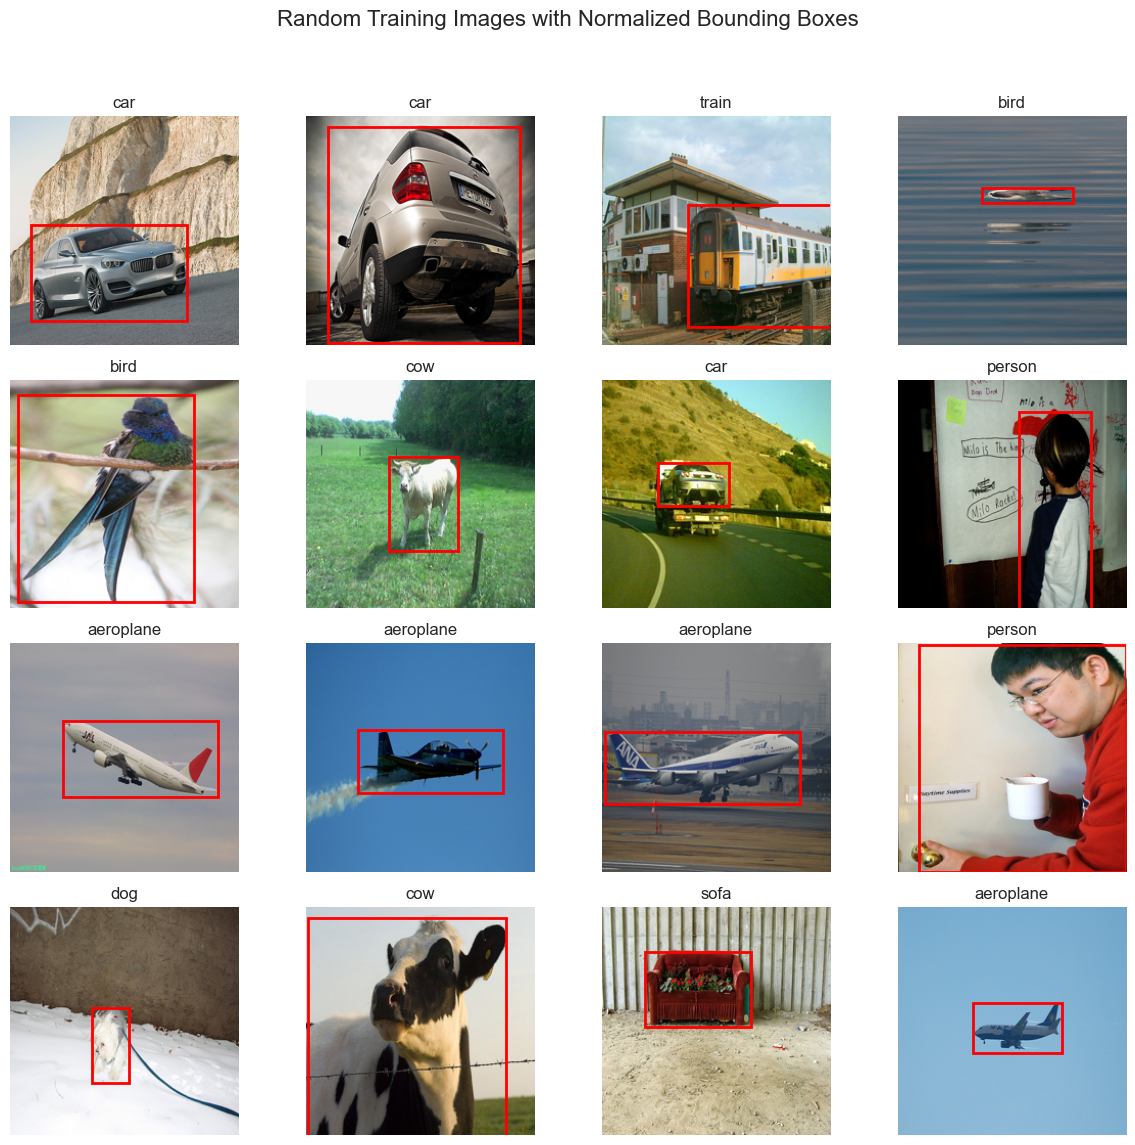

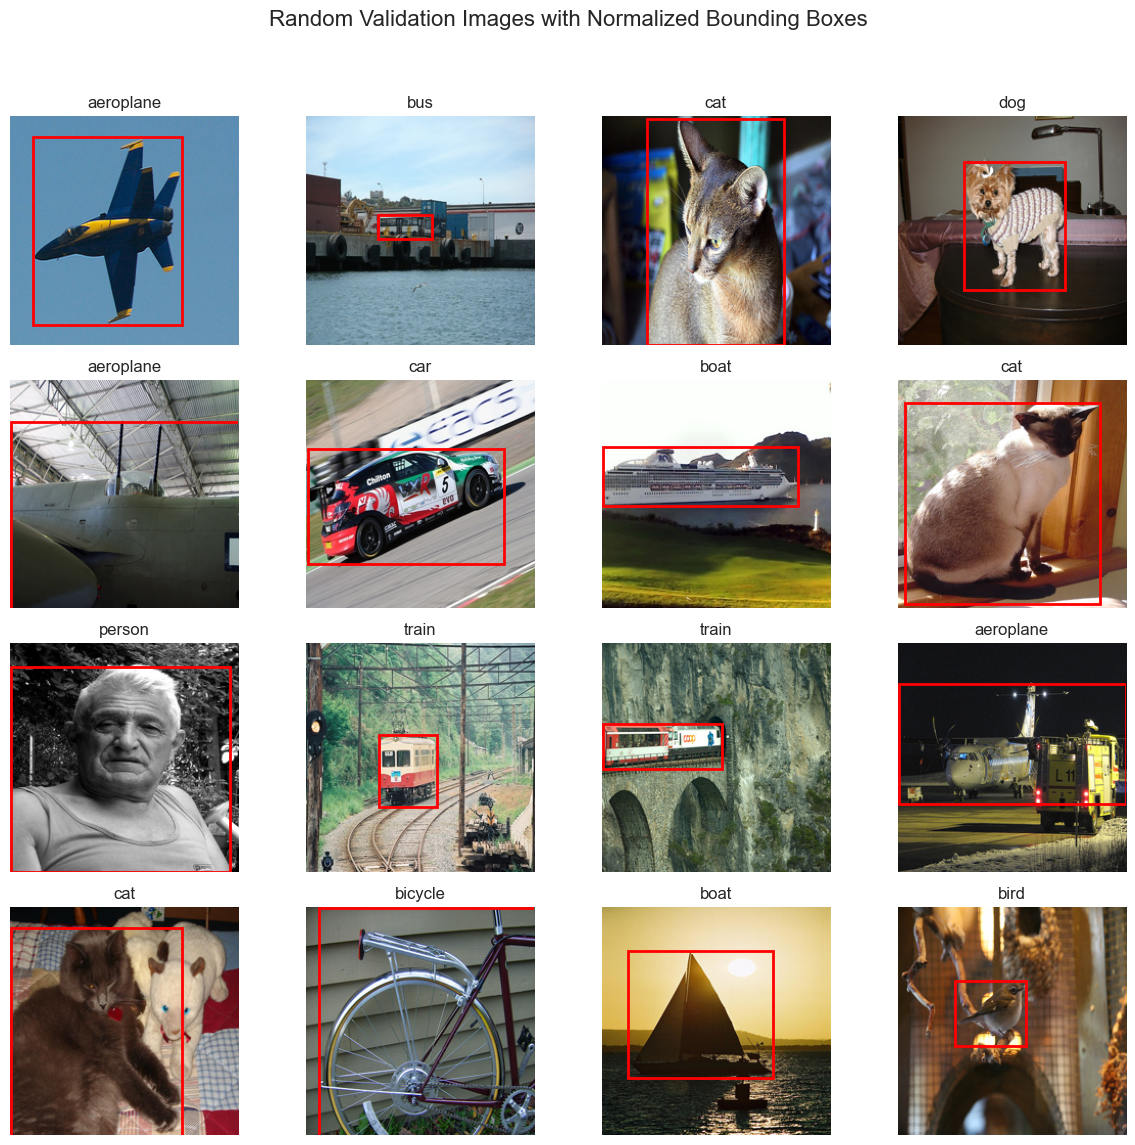

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def plot_random_images_with_normalized_bboxes(images, classes, bounding_boxes, n_cols=4, n_rows=4, title="Random Images with Normalized Bounding Boxes"):
    """
    Plot a grid of random images with their respective classes and normalized bounding boxes.

    :param images: List or array of images to plot.
    :param classes: List or array of class labels corresponding to the images.
    :param bounding_boxes: List or array of normalized bounding boxes corresponding to the images.
    :param n_cols: Number of columns in the plot.
    :param n_rows: Number of rows in the plot.
    :param title: Title for the plot.
    """
    total_images = len(images)
    random_indices = np.random.choice(total_images, size=n_rows * n_cols, replace=False)

    plt.figure(figsize=(n_cols * 3, n_rows * 3))
    plt.suptitle(title, fontsize=16)

    for i, index in enumerate(random_indices):
        ax = plt.subplot(n_rows, n_cols, i + 1)
        ax.imshow(images[index])
        ax.set_title(classes[index])
        ax.axis('off')  # Hide the axes

        # Convert normalized bounding boxes to pixel values
        bbox = bounding_boxes[index]
        height, width, _ = images[index].shape
        x1 = bbox[0] * width  # Normalized x1
        y1 = bbox[1] * height  # Normalized y1
        x2 = bbox[2] * width  # Normalized x2
        y2 = bbox[3] * height  # Normalized y2

        # Draw the bounding box
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1,
                                 linewidth=2, edgecolor='red', facecolor='none')
        ax.add_patch(rect)

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout
    plt.show()

# Randomly visualize training images with normalized bounding boxes
plot_random_images_with_normalized_bboxes(train_images, train_classes, train_bounding_boxes, title="Random Training Images with Normalized Bounding Boxes")

# Randomly visualize validation images with normalized bounding boxes
plot_random_images_with_normalized_bboxes(val_images, val_classes, val_bounding_boxes, title="Random Validation Images with Normalized Bounding Boxes")

In [10]:
import torch
import os
import numpy as np

# Create the directory if it doesn't exist
save_dir = 'pytorch_datasets'
os.makedirs(save_dir, exist_ok=True)

# Function to map class names to numerical labels
def map_labels_to_indices(labels):
    # Get unique class names and create a mapping to integers
    unique_labels = np.unique(labels)
    label_to_idx = {label: idx for idx, label in enumerate(unique_labels)}

    # Convert class names to their corresponding integer indices
    mapped_labels = [label_to_idx[label] for label in labels]
    
    return mapped_labels, label_to_idx

# Function to save dataset components using PyTorch
def save_dataset_torch(images, labels, bounding_boxes, name):
    # Convert numpy arrays to PyTorch tensors
    images_tensor = torch.tensor(images)  # Convert images to torch tensors

    # Map string labels to integers if necessary
    if isinstance(labels[0], str):
        labels, label_to_idx = map_labels_to_indices(labels)
        print(f'Label to index mapping: {label_to_idx}')

    labels_tensor = torch.tensor(labels)  # Convert labels to torch tensors
    bboxes_tensor = torch.tensor(bounding_boxes)  # Convert bounding boxes to torch tensors

    # Create dictionary to hold the dataset
    dataset_dict = {
        'images': images_tensor,
        'labels': labels_tensor,
        'bounding_boxes': bboxes_tensor
    }

    # Save dataset using torch.save
    torch.save(dataset_dict, os.path.join(save_dir, f'{name}_dataset.pt'))
    print(f'{name} dataset saved to {save_dir}')

# Now use the existing numpy arrays to save the train and validation datasets
save_dataset_torch(train_images, train_classes, train_bounding_boxes, 'train')
save_dataset_torch(val_images, val_classes, val_bounding_boxes, 'val')

Label to index mapping: {'aeroplane': 0, 'bicycle': 1, 'bird': 2, 'boat': 3, 'bottle': 4, 'bus': 5, 'car': 6, 'cat': 7, 'chair': 8, 'cow': 9, 'diningtable': 10, 'dog': 11, 'horse': 12, 'motorbike': 13, 'person': 14, 'pottedplant': 15, 'sheep': 16, 'sofa': 17, 'train': 18, 'tvmonitor': 19}
train dataset saved to pytorch_datasets
Label to index mapping: {'aeroplane': 0, 'bicycle': 1, 'bird': 2, 'boat': 3, 'bottle': 4, 'bus': 5, 'car': 6, 'cat': 7, 'chair': 8, 'cow': 9, 'diningtable': 10, 'dog': 11, 'horse': 12, 'motorbike': 13, 'person': 14, 'pottedplant': 15, 'sheep': 16, 'sofa': 17, 'train': 18, 'tvmonitor': 19}
val dataset saved to pytorch_datasets
